In [78]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import json
from PIL import Image
import os

In [79]:
#loads file names
atypical            = json.loads(open('/home/garima/Desktop/demo/Annotations/grade_4_new.json').read())
atypical_file_names = list(atypical["_via_img_metadata"].keys())
atypical_rectangles = [ atypical["_via_img_metadata"][fn]['regions'][0]['shape_attributes'] for fn in atypical_file_names ]
atypical_rectangles = [ (r['x'], r['y'], r['height'], r['width']) for r in atypical_rectangles]
len(atypical_file_names)

369

In [80]:
#it crops the images iteratively
#first create a folder in the destination i.e. current directory since that isn't inckuded yet
def crop(classname,atypical_file_names):

    images = []
    paths  = []
    for fn in atypical_file_names:
        path  = '/home/garima/Desktop/demo/BIOPTIGEN_AI/' + classname +  "/" +fn[:-6]
#         print(path)
        paths.append(path)
        image = plt.imread(path)
        images.append(image)
#         print(len(images))
    for i in range(0,len(images)):
#         print(i)
        bbox = atypical_rectangles[i] #it has all rect info
        kru  = paths[i]
        im   = Image.open(kru)
        x    = bbox[0]
        y    = bbox[1]
        xi   = x + bbox[2]
        yi   = y + bbox[3] 
        tup  = (x,y,xi,yi) # since PIL takes arg like this x, y, x + width , y + height 
        hey  = im.crop(tup)
        #below is the saved folder
        hey.save("/home/garima/Videos/tmp/anot_viewer/"+ classname +'/' + 'Croppednew' + str(i) + '.jpg', "JPEG",quality =100)

In [81]:
def show_images(images, boxes, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.

    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.

    cols (Default = 1): Number of columns in figure (number of rows is
                        set to np.ceil(n_images/float(cols))).

    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        x,y,h,w = boxes[n]
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        rect = patches.Rectangle((x,y),h,w,linewidth=1,edgecolor='r',facecolor='none')
        a.add_patch(rect)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images/10)
    plt.show()

In [82]:
crop("Grade 4 NEW",atypical_file_names)
print("Done")

Done


In [100]:
import pandas as pd

In [101]:
pa = pd.read_csv("/home/garima/Downloads/6class-biop - Sheet1.csv")
pa[:5]

,epoch,train_loss,valid_loss,accuracy,time
0,0,0.309696,0.184717,0.909091,0:24
1,1,0.249808,0.098196,0.972973,0:25
2,2,0.195604,0.138036,0.953317,0:25
3,3,0.143144,0.080719,0.980344,0:25
4,4,0.144851,0.116314,0.972973,0:27


In [102]:
#pa.head()
plotting_values = pa[["epoch","train_loss","valid_loss","accuracy","time"]]
df = pd.DataFrame(plotting_values)
df[:5]

,epoch,train_loss,valid_loss,accuracy,time
0,0,0.309696,0.184717,0.909091,0:24
1,1,0.249808,0.098196,0.972973,0:25
2,2,0.195604,0.138036,0.953317,0:25
3,3,0.143144,0.080719,0.980344,0:25
4,4,0.144851,0.116314,0.972973,0:27


In [103]:
#pa[["epoch"]]
#pa[["train_loss"]]



In [104]:
#pa[["train_loss","valid_loss"]].plot(kind='line',x='name',y='num_children')

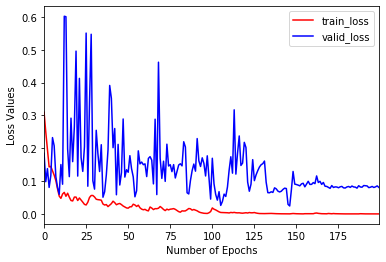

In [105]:
import matplotlib.pyplot as plt
ax = plt.gca()
df.plot(kind='line',x='epoch',y='train_loss',ax=ax,color='red')
df.plot(kind='line',x='epoch',y='valid_loss',ax=ax,color='blue')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Values")
plt.show()


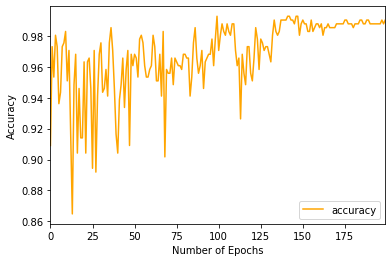

In [106]:
ax = plt.gca()
df.plot(kind='line',x='epoch',y='accuracy',ax=ax,color='orange')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

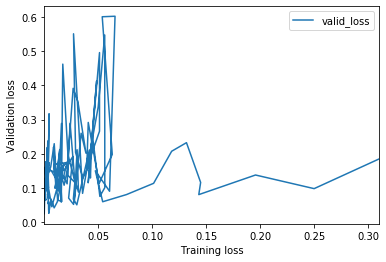

In [107]:
ax = plt.gca()
df.plot(kind='line',y='valid_loss',x='train_loss',ax=ax)
plt.xlabel("Training loss")
plt.ylabel("Validation loss")
plt.show()

# Model name:

1. Binary Classification(Normal, Abnormal)with stratch: biop-binary.pth
2. 3class with stratch: biop.pth

3. Binary Classification(Normal, Abnormal) pretrained:
4. 3class with pretrained: biop-pretrained-3class.pth

In [91]:

#Changes name of all files in a folder
import os
path = '/home/garima/Videos/tmp/anot_viewer/changed name/train/Grade3'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, 'changed3'.join([str(index), '.jpg'])))